In [11]:
push!(LOAD_PATH, "/home/cfpark/Projects/WST3D/DHC/main/")
import DHC_2DUtils
import Plots
import CUDA
import TimerOutputs
import Statistics

In [12]:
N_repeat=30;

In [13]:
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8)
t_run=Float32[]
for i in 1:N_repeat
    im=randn(256,256);
    append!(t_run,@TimerOutputs.elapsed res_gpu=DHC_2DUtils.DHC_compute_gpu(im,hash_gpu,doS2=true,doS12=true, doS20=true))
end
Statistics.mean(t_run)

0.15114994f0

In [14]:
hash=DHC_2DUtils.fink_filter_hash(1,8)
t_run=Float32[]
for i in 1:N_repeat
    im=randn(256,256);
    append!(t_run,@TimerOutputs.elapsed res=DHC_2DUtils.DHC_compute(im,hash,doS2=true,doS12=false, doS20=false,FFTthreads=8))
end
Statistics.mean(t_run)

0.17279385f0

In [15]:
hash=DHC_2DUtils.fink_filter_bank_3dizer(hash,1, nz=256)

LoadError: UndefVarError: S1_iso_matrix_3d not defined

In [65]:
2.5*3600/800230

0.011246766554615548

In [23]:
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8)
res_gpu=DHC_2DUtils.DHC_compute_gpu(im,hash_gpu,doS2=true,doS12=true, doS20=true);

In [24]:
hash=DHC_2DUtils.fink_filter_hash(1,8)
res=DHC_2DUtils.DHC_compute(im,hash,doS2=true,doS12=true, doS20=true);

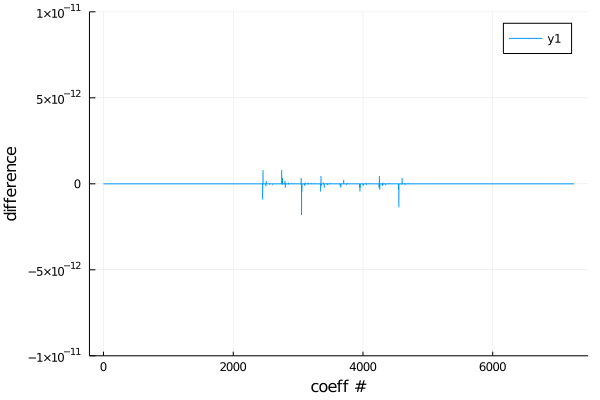

In [28]:
Plots.plot((res_gpu.-res))
Plots.plot!(ylim=(-1e-11,1e-11),ylabel="difference",xlabel="coeff #")

In [29]:
size(res)

(7254,)

In [10]:
filt,info=DHC_2DUtils.fink_filter_bank(1,8);

In [11]:
import FFTW
function fink_filter_list(filt)
    (ny,nx,Nf) = size(filt)

    # Allocate output arrays
    filtmms = Array{Int64}(undef,2,2,Nf)
    filtvals = Array{Any}(undef,Nf)#is this a terrible way to allocate memory?

    
    # Loop over filters and record non-zero values
    for l=1:Nf
        f = FFTW.fftshift(filt[:,:,l])
        ind = findall(f .> 1E-13)
        ind=getindex.(ind,[1 2])
        mins=minimum(ind,dims=1)
        maxs=maximum(ind,dims=1)
        
        #val = f[ind]
        #filtind[l] = ind
        filtmms[:,1,l] = mins
        filtmms[:,2,l] = maxs
        filtvals[l]=f[mins[1]:maxs[1],mins[2]:maxs[2]]
        
    end
    return [filtmms, filtvals]
end

fink_filter_list (generic function with 1 method)

In [12]:
mms,vals=fink_filter_list(filt);

In [54]:
import CUDA

In [55]:
thisim=CUDA.CUFFT.fft(CUDA.CuArray(randn(Float32,256,256)));

In [56]:
f_mm=mms[:,:,1]
f_val=CUDA.CuArray(vals[1]);

In [57]:
S2=randn(Float32,4,4);

In [58]:
S2[1,1]=sum(abs2.(f_val.*thisim[f_mm[1,1]:f_mm[1,2],f_mm[2,1]:f_mm[2,2]]))/(256*256);

In [128]:
import FFTW


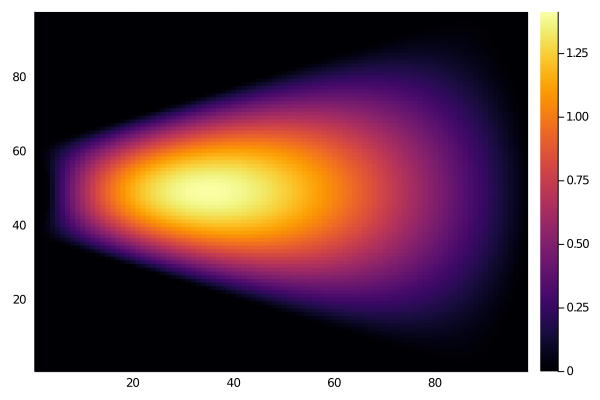

In [195]:
Plots.heatmap(vals[1])

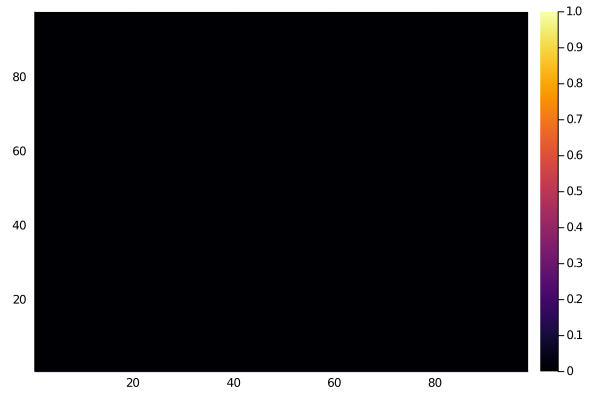

In [198]:
Plots.heatmap(FFTW.ifftshift(FFTW.fftshift(vals[1]))-vals[1])